# MNIST Data Set - Loading and Classification in  Python
**Author:** Christian Byron  **Date:** 25-May-21

This notebook provides an example of loading and classifying the MNIST dataset. The MNIST was constructed from two datasets of the US National Institute of Standards and Technology (NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. Note that the test set contains handwritten digits from different people following the same split. 

- [ ] Find a better co

### Step 1 - Open the MNIST data files from the saved location

In [1]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

path_to_MNIST_data = "C:\\Users\\s441606\\Documents\\Matlab"

trainset = datasets.MNIST(path_to_MNIST_data, download=True, train=True, transform=transform)

valset = datasets.MNIST(path_to_MNIST_data, download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [2]:
import matplotlib.pyplot as plt

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

torch.Size([64, 1, 28, 28])
torch.Size([64])


### Step 2 - Create the neural network

In [3]:
from torch import nn, optim

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)



Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


### Step3 - Initialize the network and the optimizer.

In [4]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

### Step 4 - Adjusting weights

In [5]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 8.2594e-04,  8.2594e-04,  8.2594e-04,  ...,  8.2594e-04,
          8.2594e-04,  8.2594e-04],
        [ 6.1573e-04,  6.1573e-04,  6.1573e-04,  ...,  6.1573e-04,
          6.1573e-04,  6.1573e-04],
        [-5.7334e-04, -5.7334e-04, -5.7334e-04,  ..., -5.7334e-04,
         -5.7334e-04, -5.7334e-04],
        ...,
        [ 4.8462e-03,  4.8462e-03,  4.8462e-03,  ...,  4.8462e-03,
          4.8462e-03,  4.8462e-03],
        [-2.2603e-03, -2.2603e-03, -2.2603e-03,  ..., -2.2603e-03,
         -2.2603e-03, -2.2603e-03],
        [-7.4844e-05, -7.4844e-05, -7.4844e-05,  ..., -7.4844e-05,
         -7.4844e-05, -7.4844e-05]])


### Step 5 - The core training process 

In [6]:
from time import time

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)
#print("\n", model.state_dict())

Epoch 0 - Training loss: 0.6393567340682819
Epoch 1 - Training loss: 0.27271537353266784
Epoch 2 - Training loss: 0.2101961270506893
Epoch 3 - Training loss: 0.17110631278138172
Epoch 4 - Training loss: 0.14443052462590084
Epoch 5 - Training loss: 0.12393806186685366
Epoch 6 - Training loss: 0.10817993166886254
Epoch 7 - Training loss: 0.0958428007236787
Epoch 8 - Training loss: 0.08671636580338658
Epoch 9 - Training loss: 0.08002012699191123
Epoch 10 - Training loss: 0.07356465173396728
Epoch 11 - Training loss: 0.06741516532471725
Epoch 12 - Training loss: 0.06156493458566246
Epoch 13 - Training loss: 0.058203230014761916
Epoch 14 - Training loss: 0.05277714324417089

Training Time (in minutes) = 6.455955576896668

 OrderedDict([('0.weight', tensor([[-0.0289,  0.0037, -0.0353,  ...,  0.0156, -0.0278,  0.0158],
        [ 0.0093, -0.0095,  0.0118,  ..., -0.0181,  0.0278, -0.0172],
        [-0.0130,  0.0145,  0.0085,  ..., -0.0080, -0.0200,  0.0161],
        ...,
        [-0.0030, -0.02

         0.0754,  0.0207]))])


### Step 6 - Testing & Evaluation

Predicted Digit = 7


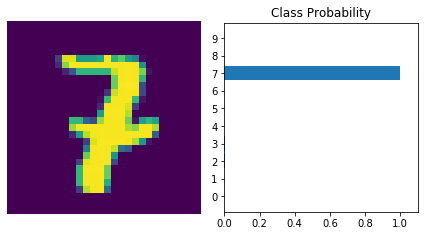

In [7]:
import numpy as np

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [8]:
import numpy as np

correct_count, all_count = 0, 0
conf_matrix = np.zeros((10,10))

for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
    conf_matrix[true_label, pred_label] += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9707


In [9]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

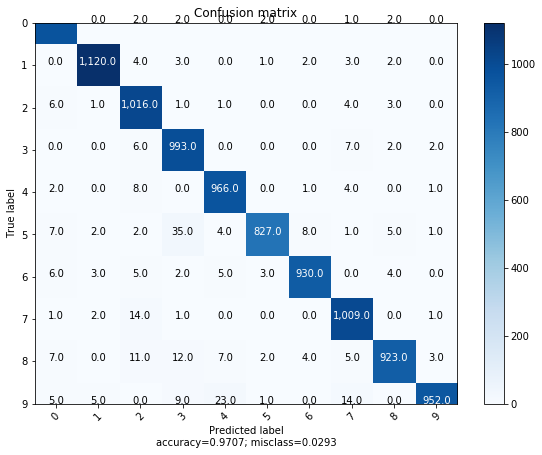

In [10]:
plot_confusion_matrix(cm = conf_matrix, normalize = False, 
                     target_names = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])


#### Lessons Learnt
- Challenge to find a good confusion matrix library without extensive library imports ( will investigate further to find decent library to settle upon)


#### References
- https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627
- https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
- https://www.analyticsvidhya.com/blog/2020/07/how-to-train-an-image-classification-model-in-pytorch-and-tensorflow/